Take the data_statistics.csv file that shows us how many images we have for species. Merge with the moths list CSV file. Then create a histogram to see how many images we have for each species.

In [120]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(2,10)})
plt.figure(figsize=(2,5))

<Figure size 200x500 with 0 Axes>

<Figure size 200x500 with 0 Axes>

In [121]:
home_dir = os.path.dirname(os.getcwd())
home_dir

'/Users/lbokeria/Documents/projects/gbif-species-trainer-AMI-fork'

In [122]:
# Load the data statistics and the moth files
data_stats   = pd.read_csv(os.path.join(home_dir,"data_download","output_files","data_statistics.csv"))
species_list = pd.read_csv(os.path.join(home_dir,"data_download","species_checklists","uksi-macro-moths-keys.csv"))

In [123]:
data_stats.shape
species_list.shape

(999, 11)

In [124]:
# Remove any NotAvail rows
species_list_nodup = species_list[species_list["gbif_species_name"] != "NotAvail"]
species_list_nodup.shape

(995, 11)

In [125]:
# Remove any duplicate rows
species_list_nodup = species_list_nodup.drop_duplicates(subset="gbif_species_name",
                                                       ignore_index=True)
species_list_nodup.shape

(990, 11)

In [126]:
# pd.options.display.max_rows = None
# pd.reset_option("display.max_rows")
species_image_count = pd.merge(species_list_nodup,data_stats[["gbif_species_name","image_count"]],
                               on="gbif_species_name",
                               how="left")
species_image_count

,accepted_taxon_key,order_name,family_name,genus_name,search_species_name,gbif_species_name,confidence,status,match_type,rank,source,image_count
0,5101394,Lepidoptera,Cossidae,Cossus,Cossus cossus,Cossus cossus,98,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0
1,1731598,Lepidoptera,Cossidae,Phragmataecia,Phragmataecia castaneae,Phragmataecia castaneae,99,ACCEPTED,EXACT,SPECIES,london31May2023,921.0
2,1730978,Lepidoptera,Cossidae,Zeuzera,Zeuzera pyrina,Zeuzera pyrina,99,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0
3,1952229,Lepidoptera,Drepanidae,Achlya,Achlya flavicornis,Achlya flavicornis,99,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0
4,1951557,Lepidoptera,Drepanidae,Cilix,Cilix glaucata,Cilix glaucata,99,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
985,8426357,Lepidoptera,Zygaenidae,Zygaena,Zygaena lonicerae,Zygaena lonicerae,99,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0
986,7674502,Lepidoptera,Zygaenidae,Zygaena,Zygaena loti,Zygaena loti,99,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0
987,7410701,Lepidoptera,Zygaenidae,Zygaena,Zygaena purpuralis,Zygaena purpuralis,98,ACCEPTED,EXACT,SPECIES,london31May2023,450.0
988,7761138,Lepidoptera,Zygaenidae,Zygaena,Zygaena trifolii,Zygaena trifolii,99,ACCEPTED,EXACT,SPECIES,london31May2023,1000.0


In [127]:
# Change NaN to 0
species_image_count.loc[pd.isna(species_image_count["image_count"]),"image_count"] = 0

In [128]:
# How many with 1000? 
n_species = len(species_image_count)

n_species_1000 = len(species_image_count[species_image_count["image_count"] == 1000])
print(f"({n_species_1000} species have 1000 images, out of {n_species}")

n_species_0 = len(species_image_count[species_image_count["image_count"] == 0])
print(f"({n_species_0} species have 0 images, out of {n_species}")

(456 species have 1000 images, out of 990
(287 species have 0 images, out of 990


In [129]:
# Save the image count file
species_image_count.to_csv(
    os.path.join(home_dir,
                 "data_download",
                 "output_files",
                 "species_image_count.csv"),
    index=False)

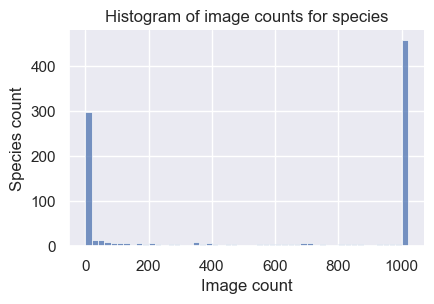

In [142]:
# Get whose with more than 0 but less than 1000 images and plot them
species_between_0_1000 = species_image_count[
    (species_image_count["image_count"] > 0) & \
        (species_image_count["image_count"] < 1000)
        ].reset_index()

species_between_0_1000

fig = sns.displot(species_image_count,
                  x="image_count",
                  binwidth=20,
                  height=3,
                  aspect=1.5).set(title="Histogram of image counts for species")

fig.set(xlabel="Image count")
fig.set(ylabel="Species count")

# sns.barplot(x = "gbif_species_name",
#             y = "image_count",
#             data = species_image_count[species_image_count["image_count"] == 1000])
# plt.xticks(rotation=90)

(0.0, 20.0)

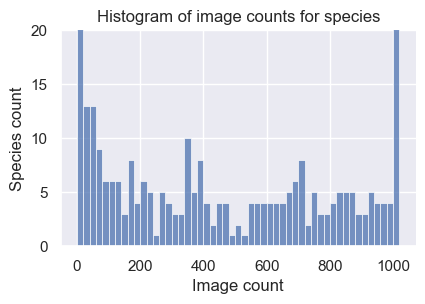

In [144]:
fig2 = sns.displot(species_image_count,
                  x="image_count",
                  binwidth=20,
                  height=3,
                  aspect=1.5).set(title="Histogram of image counts for species")

fig2.set(xlabel="Image count")
fig2.set(ylabel="Species count")

plt.ylim(0,20)